# Capstone - Initial EDA

Some EDA will be completed, using the previously cleaned London Airbnb dataset.

In [29]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import cleaned dataset:
airbnb_ldn = pd.read_csv('airbnb_ldn_final.csv')

In [4]:
airbnb_ldn.shape

(32686, 39)

In [5]:
# drop 'Unnamed', column added due to additional index column being added with the import of the cleaned data:
airbnb_ldn.drop(columns = 'Unnamed: 0', inplace=True)

In [6]:
airbnb_ldn.columns

Index(['Listing Title', 'Property Type', 'Listing Type', 'City', 'Zipcode',
       'Number of Reviews', 'Bedrooms', 'Bathrooms', 'Max Guests',
       'Airbnb Superhost', 'Cancellation Policy', 'Cleaning Fee (Native)',
       'Extra People Fee(Native)', 'Check-in Time', 'Checkout Time',
       'Minimum Stay', 'Latitude', 'Longitude', 'Overall Rating',
       'Airbnb Communication Rating', 'Airbnb Accuracy Rating',
       'Airbnb Cleanliness Rating', 'Airbnb Checkin Rating',
       'Airbnb Location Rating', 'Airbnb Value Rating', 'Amenities',
       'Airbnb Host ID', 'Host Listing Count', 'guest_controls',
       'Pets Allowed', 'Count Available Days LTM', 'Count Blocked Days LTM',
       'Count Reservation Days LTM', 'Occupancy Rate LTM',
       'Number of Bookings LTM',
       'Number of Bookings LTM - Number of observed month',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (Native)'],
      dtype='object')

## Postcode Relevance

The first piece of EDA will be looking at the influence different regions have. To accurately model the dataset based on regions, the different rows must be grouped based on relevant locational differences. There are several columns that have locational information, these are: 'City', 'Zipcode' (sometimes referred to as Postcode), 'Latitude' and 'Longitude'. All of these different columns contain information that can and will be useful at different points in this project. For now, the easiest way to split the various rows of information is using the 'Zipcode' column.

Dataframes will be created for each of the different main London postal code prefix regions (denoted by the first or first two characters of the Zipcode). These are: W, WC, SW, NW, N, E, EC, SE.

In [7]:
# Create dataframes for each of the different postcode combinations in London:
w_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

n_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('W')]

e_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

wc_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.contains('WC')]

nw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW')]

sw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW')]

se_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE')]

ec_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('EC')]

The main dataframe has been split into separate dataframes for each London postcode prefix. 

The mean of the 'Average Daily Rate (Native)', will be plotted:

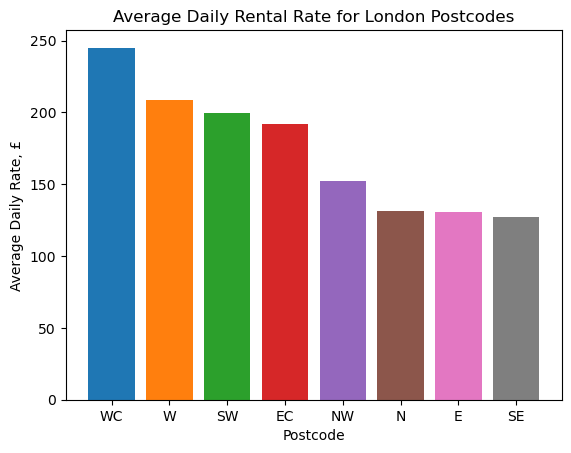

In [8]:
plt.figure()
plt.bar('WC', wc_zip['Average Daily Rate (Native)'].mean())
plt.bar('W', w_zip['Average Daily Rate (Native)'].mean())
plt.bar('SW', sw_zip['Average Daily Rate (Native)'].mean())
plt.bar('EC', ec_zip['Average Daily Rate (Native)'].mean())
plt.bar('NW', nw_zip['Average Daily Rate (Native)'].mean())
plt.bar('N', n_zip['Average Daily Rate (Native)'].mean())
plt.bar('E', e_zip['Average Daily Rate (Native)'].mean())
plt.bar('SE', se_zip['Average Daily Rate (Native)'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Daily Rental Rate for London Postcodes')
plt.show()

Looking at the bar chart above, it can be seen that the three most expensive regions all have a 'W' in their postcode prefix. This would indicate, that rental properties west of central in London, tend to demand a higher daily rental rate.

Hence, an initial insight is that there does definitely seem to be some correlation between London region and average daily rental rate. Will the conclusion being that properties with a 'W' in their prefix tend to be more expensive to rent.

Now, the quantity of Airbnb properties within different postcodes will be investigated:

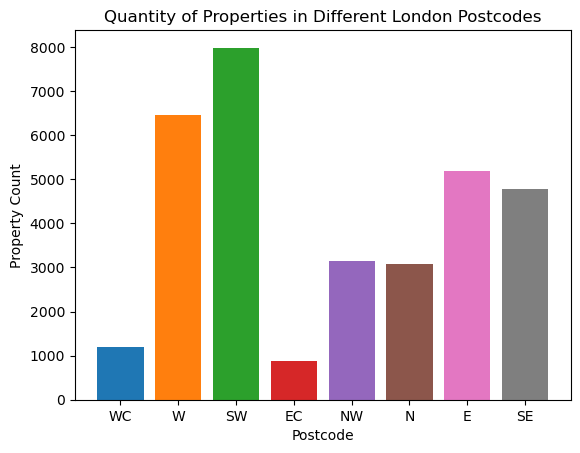

In [9]:
# determining the number of airbnb properties within each postcode:

plt.figure()
plt.bar('WC', len(wc_zip))
plt.bar('W', len(w_zip))
plt.bar('SW', len(sw_zip))
plt.bar('EC', len(ec_zip))
plt.bar('NW', len(nw_zip))
plt.bar('N', len(n_zip))
plt.bar('E', len(e_zip))
plt.bar('SE', len(se_zip))
plt.xlabel('Postcode')
plt.ylabel('Property Count')
plt.title('Quantity of Properties in Different London Postcodes')
plt.show()

From the bar chart above, it can be seen that 'SW' and 'W' are the two postal regions with the highest quantity of Airbnb properties, these are also two of the most expensive areas to rent.

Initially, it could be suggested that W and SW would be good places to invest in an Airbnb property. This will be investigated further to determine the relative success of Airbnb properties within these areas:

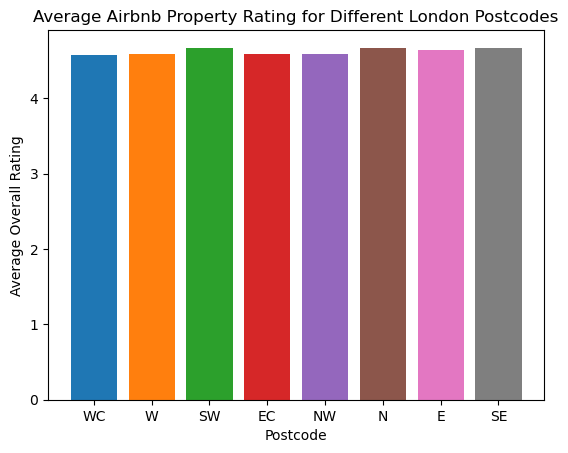

In [10]:
# plotting average overall rating against postcode region:

plt.figure()
plt.bar('WC', wc_zip['Overall Rating'].mean())
plt.bar('W', w_zip['Overall Rating'].mean())
plt.bar('SW', sw_zip['Overall Rating'].mean())
plt.bar('EC', ec_zip['Overall Rating'].mean())
plt.bar('NW', nw_zip['Overall Rating'].mean())
plt.bar('N', n_zip['Overall Rating'].mean())
plt.bar('E', e_zip['Overall Rating'].mean())
plt.bar('SE', se_zip['Overall Rating'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Overall Rating')
plt.title('Average Airbnb Property Rating for Different London Postcodes')
plt.show()

The results are very close, but it looks as though 'SW' potentially has the highest average rating. This will be confirmed numerically: 

In [11]:
print(f"The average overall rating for WC properties is {wc_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for W properties is {w_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for SW properties is {sw_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for EC properties is {ec_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for NW properties is {nw_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for N properties is {n_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for E properties is {e_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for SE properties is {se_zip['Overall Rating'].mean()} stars")

The average overall rating for WC properties is 4.576090604026845 stars
The average overall rating for W properties is 4.593088485975516 stars
The average overall rating for SW properties is 4.662279273638072 stars
The average overall rating for EC properties is 4.584096109839816 stars
The average overall rating for NW properties is 4.591134413727359 stars
The average overall rating for N properties is 4.666709886547812 stars
The average overall rating for E properties is 4.641505791505791 stars
The average overall rating for SE properties is 4.670670859538784 stars


It can be seen that SW, N and SE, are the leaders with approximately the same average rating of 4.67.

Now the average occupancy rate for each postcode will be assessed. Areas that charge a lot, have lots of properties and high ratings may not have much demand and hence can't necessarily be considered successful. This plot will be very influencial throughout the entire analysis:

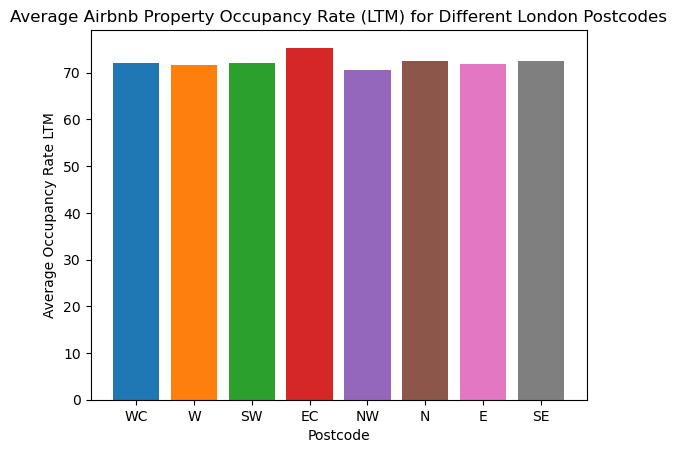

In [12]:
# plotting average occupancy rate against postcode region:

plt.figure()
plt.bar('WC', wc_zip['Occupancy Rate LTM'].mean())
plt.bar('W', w_zip['Occupancy Rate LTM'].mean())
plt.bar('SW', sw_zip['Occupancy Rate LTM'].mean())
plt.bar('EC', ec_zip['Occupancy Rate LTM'].mean())
plt.bar('NW', nw_zip['Occupancy Rate LTM'].mean())
plt.bar('N', n_zip['Occupancy Rate LTM'].mean())
plt.bar('E', e_zip['Occupancy Rate LTM'].mean())
plt.bar('SE', se_zip['Occupancy Rate LTM'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Occupancy Rate LTM')
plt.title('Average Airbnb Property Occupancy Rate (LTM) for Different London Postcodes')
plt.show()

The graph above shows that on the whole, all London postal regions have very high average occupation rates over the last 12 months; with EC having the highest. The previously identified areas of high rental income (WC, W, SW) all have average occupancy rates over 70%, proving that demand is high regardless of the rental amount. 

Hence, an immediate insight to prospective Airbnb property investors would be that purchasing a property with a W postcode would be a safebet in ensuring a high return on your initial investment. High rental rates, high overall ratings and high occupancy rates point to a very successful region.

**Looking at the correlation between overall rating and daily rental rate**

This comparison will be completed to see how the 'Avaerage Daily Rate' and the overall rating the property receives are related. 

First, the number of variables of overall ratings will be determined:

In [13]:
print(airbnb_ldn['Overall Rating'].unique())
print(f"The maximum rating a property can receive is {airbnb_ldn['Overall Rating'].max()} stars")
print(f"The minimum rating a property can receive is {airbnb_ldn['Overall Rating'].min()} stars")

[4.1 4.8 5.  4.  4.7 4.2 4.9 4.4 3.5 4.5 4.6 2.4 3.4 4.3 3.9 3.  1.  3.8
 3.6 3.2 3.1 2.  2.5 3.3 2.8 3.7 1.5 2.9 1.6 2.6 2.2 2.7 2.1]
The maximum rating a property can receive is 5.0 stars
The minimum rating a property can receive is 1.0 stars


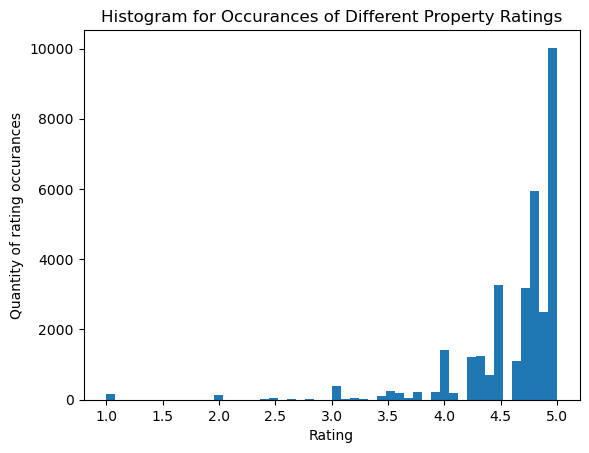

In [14]:
plt.figure()
plt.hist(airbnb_ldn['Overall Rating'], bins = 50)
plt.ylabel('Quantity of rating occurances')
plt.xlabel('Rating')
plt.title('Histogram for Occurances of Different Property Ratings')
plt.show()

Can see that the vast majority of ratings are above approximately 4.2 stars. Hence, the majority of London airbnb rental properties can be deemed to be off a high quality already.

These ratings and the Average daily rate will now be compared:

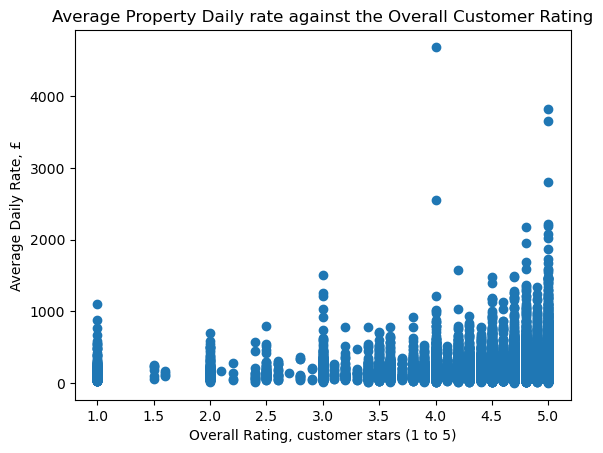

In [15]:
plt.figure()
plt.scatter(airbnb_ldn['Overall Rating'], airbnb_ldn['Average Daily Rate (Native)'])
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()

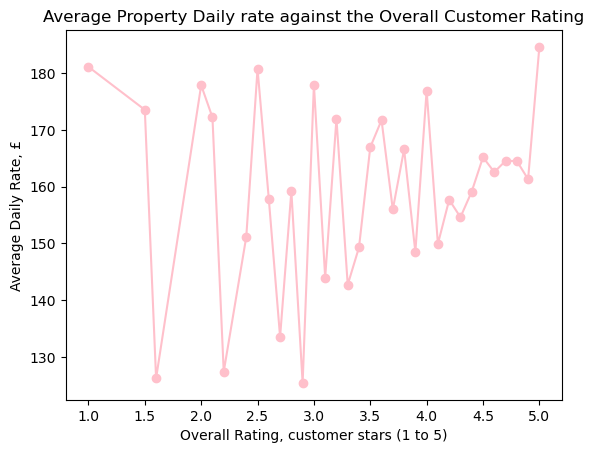

In [16]:
plt.figure()
(airbnb_ldn.groupby('Overall Rating')['Average Daily Rate (Native)'].mean()).plot(marker ='o', color ='pink')
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()

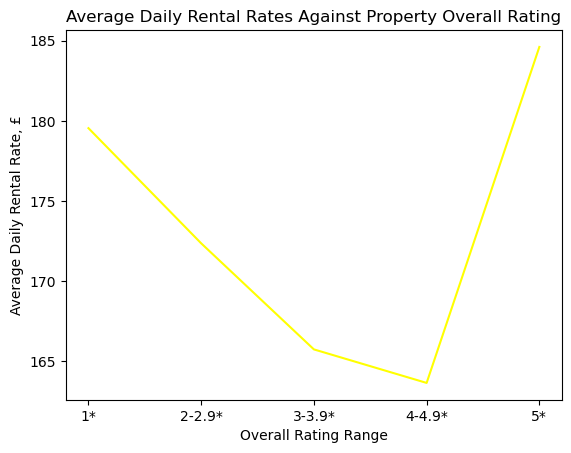

In [17]:
# ranged data

X_values = ['1*', '2-2.9*', '3-3.9*', '4-4.9*', '5*']

y_values = [
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 1) & (airbnb_ldn['Overall Rating'] <= 1.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 2) & (airbnb_ldn['Overall Rating'] <= 2.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 3) & (airbnb_ldn['Overall Rating'] <= 3.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] == 5)]['Average Daily Rate (Native)'].mean()
            ]
            
plt.plot(X_values, y_values, color='yellow')
plt.xlabel('Overall Rating Range')
plt.ylabel('Average Daily Rental Rate, £')
plt.title('Average Daily Rental Rates Against Property Overall Rating')
plt.show()


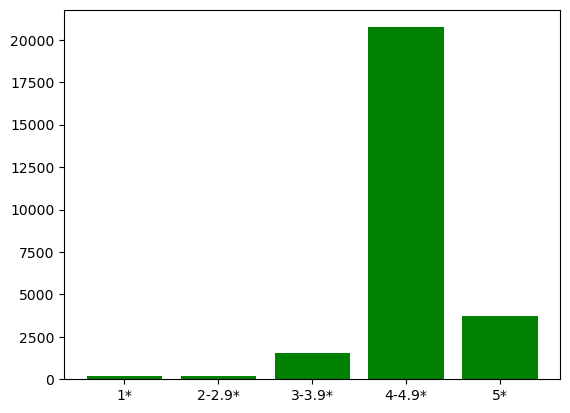

In [18]:
y_rating_quantities = [len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 1) & (airbnb_ldn['Overall Rating'] <= 1.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 2) & (airbnb_ldn['Overall Rating'] <= 2.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 3) & (airbnb_ldn['Overall Rating'] <= 3.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] == 5)].value_counts())]

plt.bar(X_values, y_rating_quantities, color = 'green')
plt.show()

In [19]:
len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)])


20735

## EDA on the Target Column

The target column is the 'Annual Revenue (LTM)' column. 

This column will be explored further:

In [20]:
print(f"The maximum yearly income of any London Airbnb property is £{airbnb_ldn['Annual Revenue LTM (Native)'].max()}.")
print(f"The minimum yearly income of any London Airbnb property is £{airbnb_ldn['Annual Revenue LTM (Native)'].min()}.")

The maximum yearly income of any London Airbnb property is £357897.7.
The minimum yearly income of any London Airbnb property is £6.3.


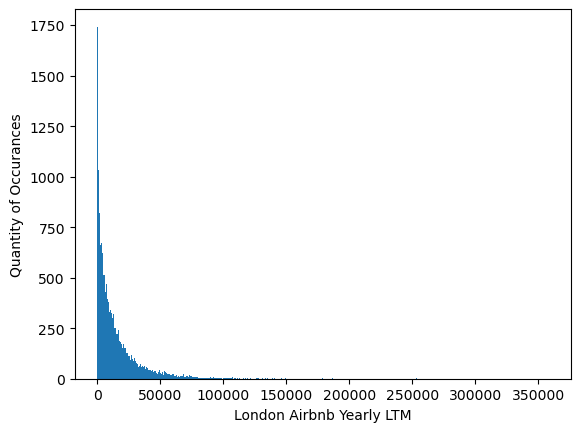

In [21]:
plt.figure()
plt.hist(airbnb_ldn['Annual Revenue LTM (Native)'], bins=1000)
plt.xlabel('London Airbnb Yearly LTM')
plt.ylabel('Quantity of Occurances')
plt.show()

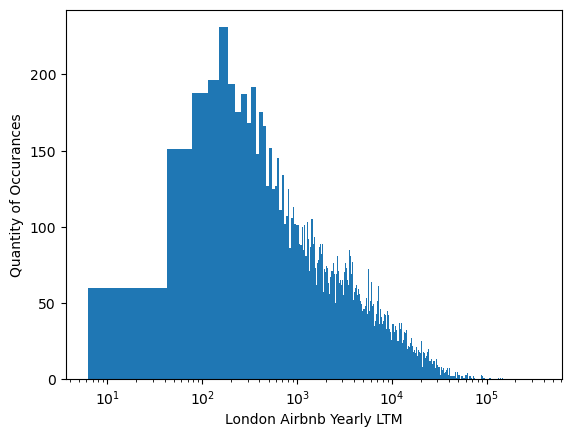

In [22]:
# Plot the same graph but using a 'log' scale on the x-axis, to see how this alteres/improves the distribution
plt.figure()
plt.hist(airbnb_ldn['Annual Revenue LTM (Native)'], bins=10000)
plt.xlabel('London Airbnb Yearly LTM')
plt.ylabel('Quantity of Occurances')
plt.xscale('log')
plt.show()

Initial aspects of EDA that are important:

**Complete now but will require re-ordering prior to submission**

In [23]:
airbnb_ldn.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Listing Title                                      5 non-null      object 
 1   Property Type                                      5 non-null      object 
 2   Listing Type                                       5 non-null      object 
 3   City                                               5 non-null      object 
 4   Zipcode                                            5 non-null      object 
 5   Number of Reviews                                  5 non-null      int64  
 6   Bedrooms                                           5 non-null      object 
 7   Bathrooms                                          5 non-null      int64  
 8   Max Guests                                         5 non-null      int64  
 9   Airbnb Superho

In [24]:
num_cols = airbnb_ldn.select_dtypes(include=['int', 'float64'])
num_cols.head().T

,0,1,2,3,4
Number of Reviews,9.000000e+00,1.100000e+01,1.000000e+00,2.000000e+01,0.000000e+00
Bathrooms,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
Max Guests,6.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00
Cleaning Fee (Native),1.548000e+02,0.000000e+00,0.000000e+00,3.480000e+01,0.000000e+00
Extra People Fee(Native),0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00
Minimum Stay,3.000000e+00,1.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00
Latitude,5.143105e+01,5.143399e+01,5.143500e+01,5.143531e+01,5.143532e+01
Longitude,-2.607400e-01,-2.565600e-01,-2.570000e-01,-2.564800e-01,-2.541300e-01
Overall Rating,4.100000e+00,4.800000e+00,5.000000e+00,4.800000e+00,4.000000e+00
Airbnb Communication Rating,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01


In [25]:
cat_cols = airbnb_ldn.select_dtypes(include='object')
cat_cols.head().T

,0,1,2,3,4
Listing Title,Cozy 2BR house with a garden view,GuestReady - Amazing home with a private garden,Cosy cottage on Richmond Park,"Entire Flat. Free parking, Garden , Richmond park",Maisonette inbetween Richmond Park and Wimbledon
Property Type,Entire home,Entire home,Entire home,Entire rental unit,Private room in rental unit
Listing Type,entire_home,entire_home,entire_home,entire_home,private_room
City,Greater London,Greater London,Greater London,Greater London,Greater London
Zipcode,SW15 3,SW15 3,SW15 3,SW15 3,SW15 3
Bedrooms,2,2,1,2,1
Airbnb Superhost,f,t,f,f,f
Cancellation Policy,strict_14_with_grace_period,NaN,NaN,strict_14_with_grace_period,strict_14_with_grace_period
Check-in Time,12:00 PM - 12:00 AM,3:00 PM - 12:00 AM,After 3:00 PM,3:00 PM - 11:00 PM,12:00 PM - 10:00 PM
Checkout Time,10:00 AM,11:00 AM,11:00 AM,11:00 AM,11:00 AM


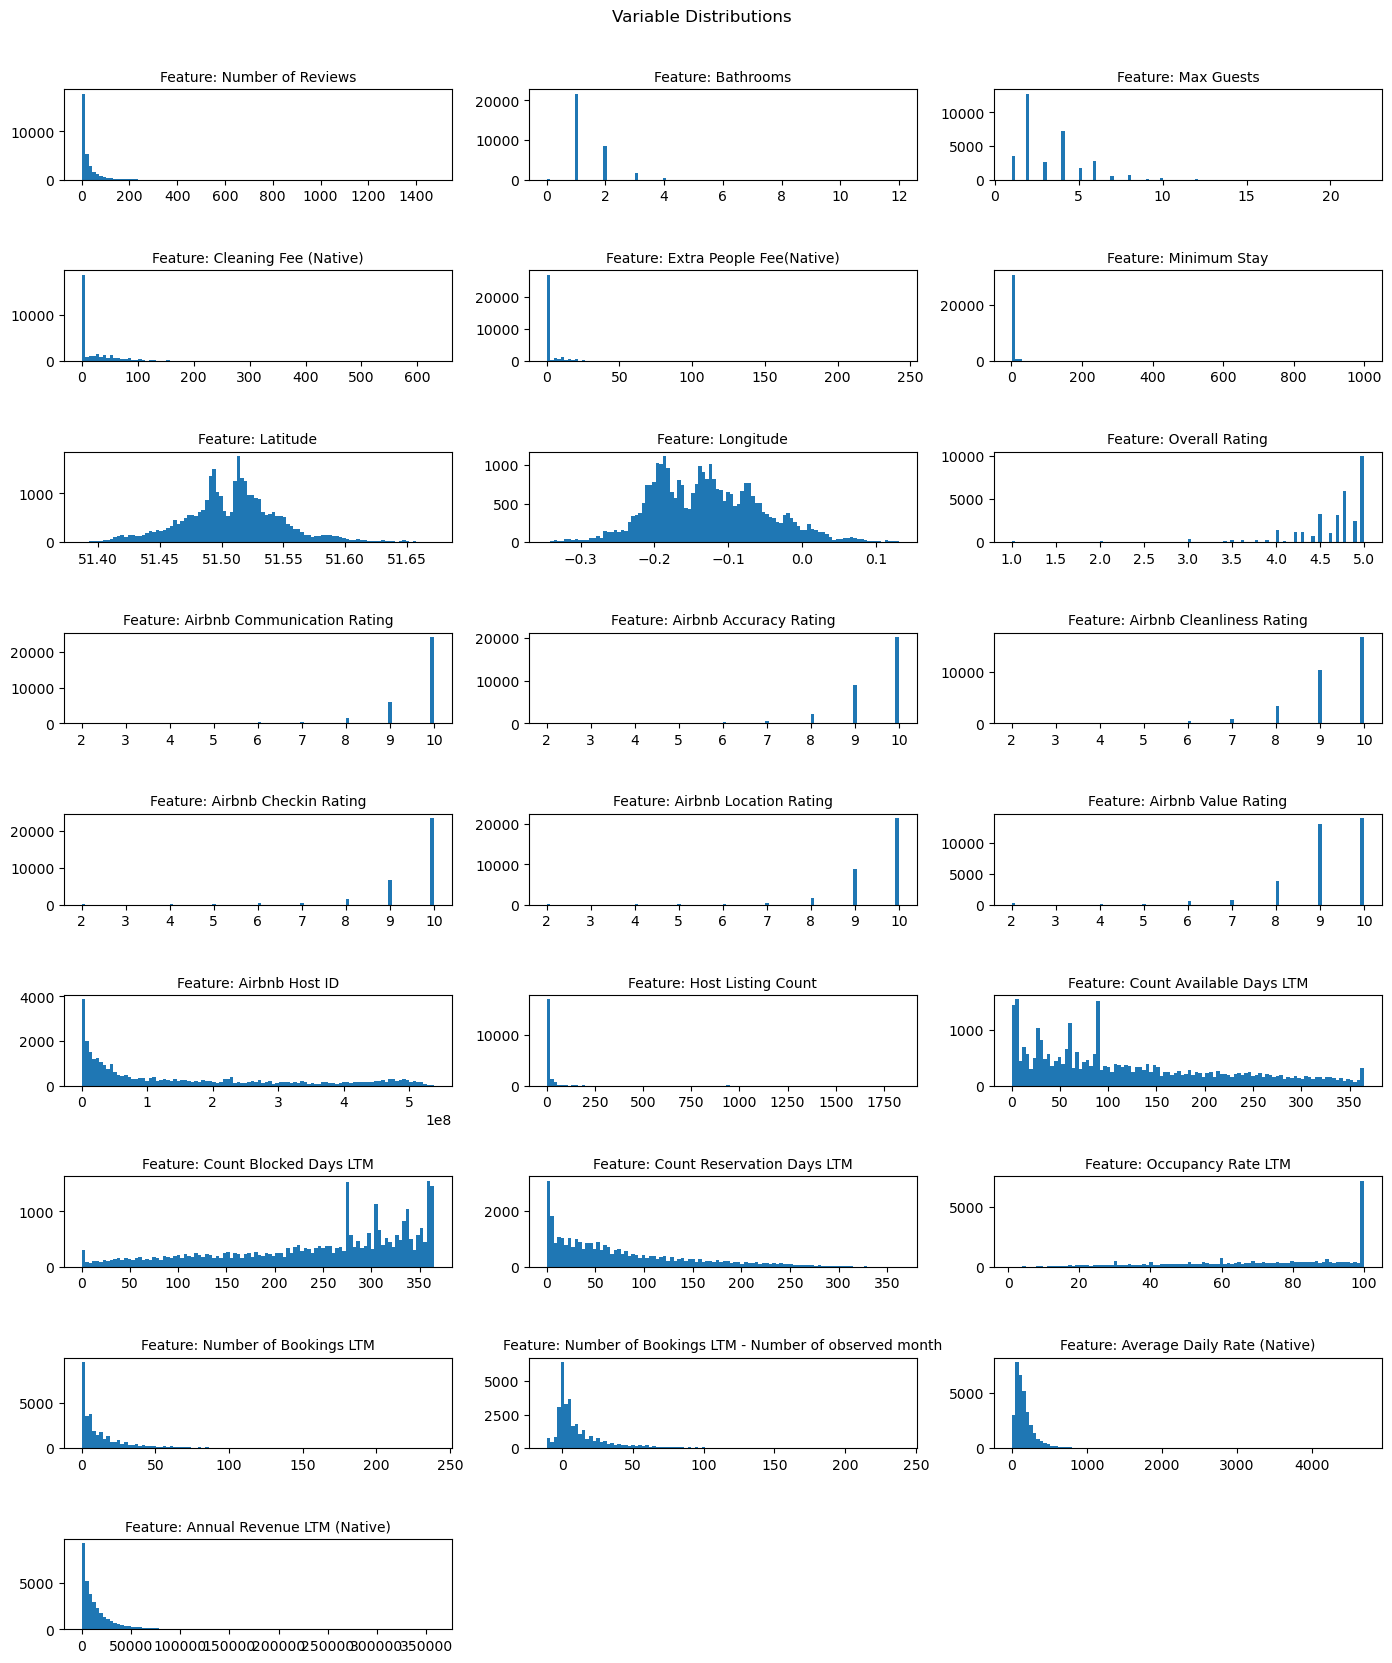

In [32]:
# create a subplots structure with 4 columns and 5 rows
cols = 3
rows = len(num_cols.columns)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Variable Distributions', y=0.92)

for i, column in enumerate(num_cols.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(num_cols[column], bins=100)


plt.show()

A lot of the columns are skewed (both left and right). A 'log' transformation can be used, to produce more normally distributed graphs for each of the numerical columns:

In [ ]:
# Log scale ALL columns, add 1 to avoid taking the log of 0
cc_df_log = np.log(cc_df + 1)

In [34]:
# Log scale all columns, add 1 to avoid taking the log of 0
num_cols_log = np.log(num_cols.drop(columns = ['Longitude', 'Latitude']) + 1)

c:\Users\blcm9\anaconda3\envs\capstone\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\blcm9\anaconda3\envs\capstone\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


ValueError: supplied range of [-inf, 5.476463551931511] is not finite

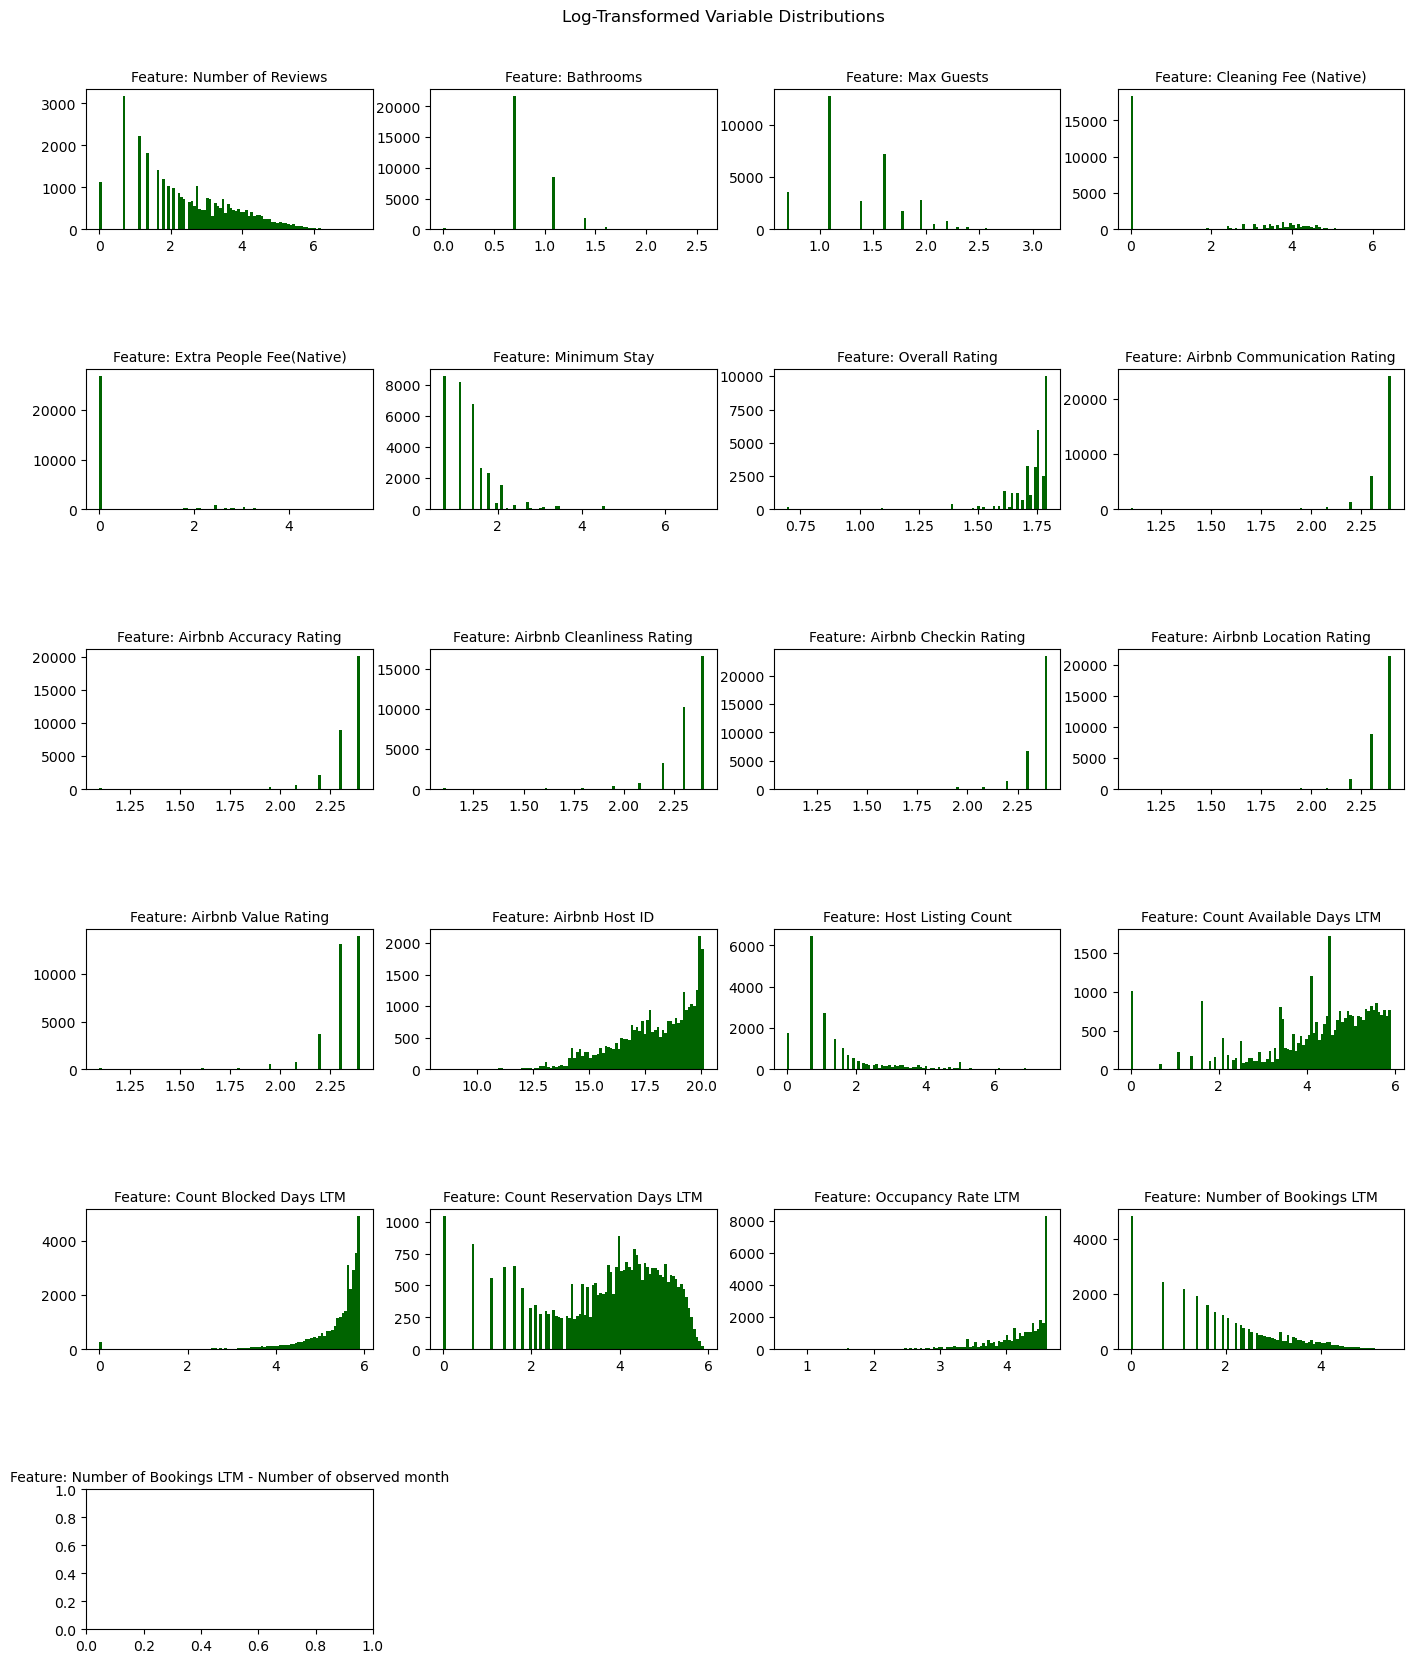

In [35]:
# create a subplots structure with 4 columns and 5 rows
cols = 4
rows = len(num_cols_log.columns)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Log-Transformed Variable Distributions', y=0.92)

for i, column in enumerate(num_cols_log.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(num_cols_log[column], bins=100, color='darkgreen')

plt.show()